In [2]:
# 用均值滤波、中值滤波、高斯滤波处理高斯噪声和椒盐噪声
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
# from ImageAddNoise import *
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

# 添加高斯噪声
def addGaussianNoise(src,mu,sigma):
    NoiseImg=src.copy()
    NoiseImg=NoiseImg/NoiseImg.max()
    rows,cols=NoiseImg.shape[:2]
    for i in range(rows):
        for j in range(cols):
            #python里使用random.gauss函数加高斯噪声
            NoiseImg[i,j]=NoiseImg[i,j]+random.gauss(mu,sigma) 
#             NoiseImg[i,j]=NoiseImg[i,j]+np.random.normal(mu,sigma) 
            if  NoiseImg[i,j]< 0:
                 NoiseImg[i,j]=0
            elif  NoiseImg[i,j]>1:
                 NoiseImg[i,j]=1
    NoiseImg=np.uint8(NoiseImg*255)
    return NoiseImg

#给图像添加椒盐噪声
def addSaltAndPepper(src, percentage):
    #NoiseImg = src         #使用此语句传递的是地址，程序会出错
    NoiseImg = src.copy()   #在此要使用copy函数，否则src和主程序中的img都会跟着改变
    NoiseNum = int(percentage * src.shape[0] * src.shape[1])
    for i in range(NoiseNum):
        randX = random.randint(0, src.shape[0] - 1)  #产生[0, src.shape[0] - 1]之间随机整数
        randY = random.randint(0, src.shape[1] - 1)
        if random.randint(0, 1) == 0:  
            NoiseImg[randX, randY] = 0
        else:
            NoiseImg[randX, randY] = 255
    return NoiseImg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()


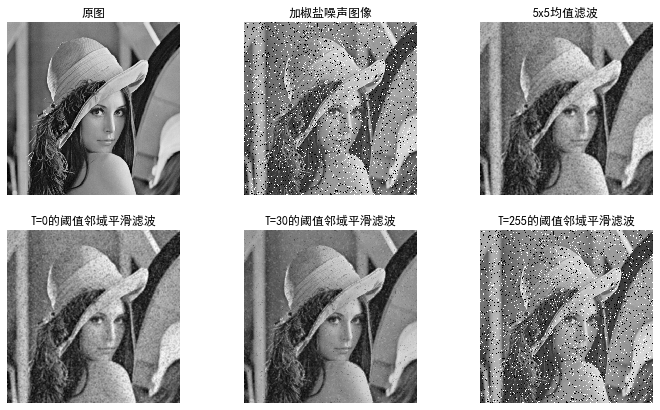

In [3]:
# 阈值邻域平滑滤波和均值滤波
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
# from ImageAddNoise import *
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负
#阈值均值平滑滤波
def threshAverFilter(imgNoise,T):
    imgAver=cv2.blur(imgNoise,(5,5)) 
    row,col=imgNoise.shape
    imgThresh=np.zeros((row,col))
    for i in range(row):
        for j in range(col):
            if np.abs(imgNoise[i,j]-imgAver[i,j])>T:
                imgThresh[i,j]=imgAver[i,j]
            else:
                imgThresh[i,j]=imgNoise[i,j] 
    return imgThresh

img = cv2.imread(r"..\img\lenna.png",0)    

imgNoise=addSaltAndPepper(img, 0.1)  
imgAver=cv2.blur(imgNoise,(5,5)) 
imgThresh1=threshAverFilter(imgNoise,0)
imgThresh2=threshAverFilter(imgNoise,30)
imgThresh3=threshAverFilter(imgNoise,255)


plt.figure(figsize=(12,7))
plt.subplot(231)
plt.imshow(img,cmap='gray')
plt.title("原图")
plt.axis('off')  #不显示坐标轴
plt.subplot(232)
plt.imshow(imgNoise,cmap='gray')
plt.title("加椒盐噪声图像")
plt.axis('off')  #不显示坐标轴
plt.subplot(233)
plt.imshow(imgAver,cmap='gray')
plt.title("5x5均值滤波")
plt.axis('off')  #不显示坐标轴
plt.subplot(234)
plt.imshow(imgThresh1,cmap='gray')
plt.title("T=0的阈值邻域平滑滤波")
plt.axis('off')  #不显示坐标轴
plt.subplot(235)
plt.imshow(imgThresh2,cmap='gray')
plt.title("T=30的阈值邻域平滑滤波")
plt.axis('off')  #不显示坐标轴
plt.subplot(236)
plt.imshow(imgThresh3,cmap='gray')
plt.title("T=255的阈值邻域平滑滤波")
plt.axis('off')  #不显示坐标轴
# plt.show()
plt.savefig("ch03-29-thresh.jpg")